# 0-Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D,Input,Lambda





2025-01-19 15:05:42.121895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 15:05:42.264577: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 15:05:42.301030: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 15:05:42.927109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

2025-01-19 15:05:43.762847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-19 15:05:44.366376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14120 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:c3:00.0, compute capability: 8.6


# 1- Load Data

In [3]:
s_aureus = pd.read_csv('e_coli_driams_b_2000_20000Da_v2 (1).csv')
s_aureus.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19988,19991,19994,19997,code,species,Ciprofloxacin,Ceftriaxone,Cefepime,Piperacillin-Tazobactam
0,1067.142857,1251.714286,1310.571429,1021.142857,1315.625000,974.000000,936.857143,853.571429,936.142857,1044.285714,...,21.5,6.500000,4.666667,17.585859,dcd5aa31-b254-4961-b69f-ccc8c0572b27,Escherichia coli,0.0,0.0,0.0,0.0
1,1872.857143,1677.285714,2035.714286,2086.250000,1930.571429,2017.142857,1856.857143,1655.857143,1547.142857,1713.000000,...,21.0,15.000000,26.500000,21.736842,dfcb7221-e4f8-4a39-b661-7e439f19e93d,Escherichia coli,0.0,0.0,0.0,0.0
2,3258.142857,3209.428571,3068.571429,3162.428571,3275.000000,3324.571429,2999.000000,2970.500000,3213.000000,3205.571429,...,17.0,17.000000,30.000000,19.125000,d5bb4389-5053-4107-9c05-bfed9e9159c9,Escherichia coli,0.0,0.0,0.0,0.0
3,18912.571429,19530.571429,19464.875000,19098.714286,18994.714286,18936.285714,19208.571429,19417.571429,19486.857143,19048.625000,...,299.0,339.500000,359.000000,311.746032,4e14943f-ae22-42ed-aef5-65430470dcfa,Escherichia coli,0.0,0.0,0.0,0.0
4,1685.000000,1537.428571,1283.714286,1472.285714,1370.142857,1402.142857,1397.500000,1422.142857,1725.285714,3386.714286,...,32.5,48.333333,66.500000,39.230769,617f14d0-86b1-4c28-8995-b02006a85e81,Escherichia coli,1.0,1.0,1.0,1.0


# Preprocessing Data

In [4]:
s_aureus = s_aureus.drop(columns=['code','species', 'Ciprofloxacin', 'Ceftriaxone', 'Cefepime'])
s_aureus.dropna(axis=0, how="any", inplace=True)

In [5]:
s_aureus.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Piperacillin-Tazobactam
0,1067.142857,1251.714286,1310.571429,1021.142857,1315.625000,974.000000,936.857143,853.571429,936.142857,1044.285714,...,19.666667,20.000000,23.0,42.666667,15.000000,21.5,6.500000,4.666667,17.585859,0.0
1,1872.857143,1677.285714,2035.714286,2086.250000,1930.571429,2017.142857,1856.857143,1655.857143,1547.142857,1713.000000,...,32.000000,29.666667,30.0,18.000000,17.000000,21.0,15.000000,26.500000,21.736842,0.0
2,3258.142857,3209.428571,3068.571429,3162.428571,3275.000000,3324.571429,2999.000000,2970.500000,3213.000000,3205.571429,...,19.666667,20.000000,23.5,14.500000,13.666667,17.0,17.000000,30.000000,19.125000,0.0
3,18912.571429,19530.571429,19464.875000,19098.714286,18994.714286,18936.285714,19208.571429,19417.571429,19486.857143,19048.625000,...,299.000000,269.333333,282.0,300.500000,311.000000,299.0,339.500000,359.000000,311.746032,0.0
4,1685.000000,1537.428571,1283.714286,1472.285714,1370.142857,1402.142857,1397.500000,1422.142857,1725.285714,3386.714286,...,25.000000,34.000000,33.0,37.333333,21.000000,32.5,48.333333,66.500000,39.230769,1.0


In [6]:
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Piperacillin-Tazobactam
0,1067.142857,1251.714286,1310.571429,1021.142857,1315.625000,974.000000,936.857143,853.571429,936.142857,1044.285714,...,19.666667,20.000000,23.000000,42.666667,15.000000,21.500000,6.500000,4.666667,17.585859,0.0
1,1872.857143,1677.285714,2035.714286,2086.250000,1930.571429,2017.142857,1856.857143,1655.857143,1547.142857,1713.000000,...,32.000000,29.666667,30.000000,18.000000,17.000000,21.000000,15.000000,26.500000,21.736842,0.0
2,3258.142857,3209.428571,3068.571429,3162.428571,3275.000000,3324.571429,2999.000000,2970.500000,3213.000000,3205.571429,...,19.666667,20.000000,23.500000,14.500000,13.666667,17.000000,17.000000,30.000000,19.125000,0.0
3,18912.571429,19530.571429,19464.875000,19098.714286,18994.714286,18936.285714,19208.571429,19417.571429,19486.857143,19048.625000,...,299.000000,269.333333,282.000000,300.500000,311.000000,299.000000,339.500000,359.000000,311.746032,0.0
4,1685.000000,1537.428571,1283.714286,1472.285714,1370.142857,1402.142857,1397.500000,1422.142857,1725.285714,3386.714286,...,25.000000,34.000000,33.000000,37.333333,21.000000,32.500000,48.333333,66.500000,39.230769,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1933.285714,1956.500000,2012.571429,1882.000000,1955.142857,1951.285714,1943.714286,2055.125000,1928.857143,1687.571429,...,140.500000,144.500000,102.666667,123.500000,113.500000,121.000000,126.666667,147.500000,122.560748,0.0
209,7296.714286,6215.714286,6115.500000,6069.000000,6585.857143,6207.857143,5809.142857,5879.142857,6068.714286,8413.125000,...,163.000000,191.500000,151.000000,180.666667,188.500000,163.500000,183.000000,173.000000,178.163462,1.0
210,2604.500000,2626.857143,2614.857143,2408.142857,2628.428571,2723.571429,2561.142857,2282.000000,2479.375000,2511.571429,...,21.000000,4.000000,11.500000,20.000000,19.500000,19.000000,10.500000,4.666667,13.857143,1.0
211,1341.142857,1190.000000,1399.142857,1469.000000,1126.000000,1049.428571,958.857143,1092.000000,1206.857143,1211.000000,...,18.000000,21.500000,15.666667,18.000000,18.000000,22.666667,17.500000,17.000000,20.863636,0.0


In [7]:
X = s_aureus.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [9]:
bacteria = s_aureus.columns[-1]

In [10]:
cantidadTecOS = 3 # cantidad de tecnicas de oversampling

## Enfoque en clase minoritaria

In [11]:
minority_class = s_aureus[s_aureus[bacteria] == 1].drop(columns=[bacteria])


In [12]:
etiquetas = s_aureus[s_aureus[bacteria] == 1].iloc[:, 6000].values

## Diffusion model


In [13]:
import torch
import torch.nn as nn


In [14]:
torch.manual_seed(42)
np.random.seed(42)

In [15]:
# Preprocesamiento
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

In [16]:
# Modelo de Difusión
class DiffusionModel(nn.Module):
    def __init__(self, input_dim):
        super(DiffusionModel, self).__init__()
        self.model = nn.Sequential( 
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),  # Regularización Dropout
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p=0.2),  # Regularización Dropout
            nn.Linear(32, input_dim)
        )


    def forward(self, x):
        return self.model(x)


In [17]:
# Función de ruido (Scheduler)
def add_noise(data, timesteps, noise_scale=1.0):
    noise = np.random.normal(0, noise_scale, data.shape) * np.sqrt(timesteps / 100)
    noisy_data = data + noise
    return noisy_data, noise


In [18]:
# Configuración del modelo
input_dim = scaled_data.shape[1]
model = DiffusionModel(input_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.SmoothL1Loss()  # O Huber Loss


In [19]:
# Scheduler de tasa de aprendizaje
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9)


In [20]:
# Entrenamiento
scaled_data_tensor = torch.tensor(scaled_data, dtype=torch.float32)
epochs = 500
losses = []  # Para guardar la pérdida por época

for epoch in range(epochs):
    timesteps = np.random.randint(1, 100)
    noisy_data, noise = add_noise(scaled_data, timesteps)
    noisy_data_tensor = torch.tensor(noisy_data, dtype=torch.float32)
    noise_tensor = torch.tensor(noise, dtype=torch.float32)

    optimizer.zero_grad()
    predicted_noise = model(noisy_data_tensor)
    loss = loss_fn(predicted_noise, noise_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step()  # Actualiza la tasa de aprendizaje

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item()}")


Epoch 0/500 - Loss: 0.2572689354419708
Epoch 100/500 - Loss: 0.3211469054222107
Epoch 200/500 - Loss: 0.27326542139053345
Epoch 300/500 - Loss: 0.19250431656837463
Epoch 400/500 - Loss: 0.308064341545105


In [21]:
# Generación de Datos Sintéticos
def generate_synthetic_data(model, num_samples, input_dim):
    model.eval()
    with torch.no_grad():
        synthetic_data = np.random.normal(0, 1, (num_samples, input_dim))
        for t in range(100, 0, -1):  # Reverse diffusion
            synthetic_data = synthetic_data - model(torch.tensor(synthetic_data, dtype=torch.float32)).numpy() * (t / 100)
        return synthetic_data

In [22]:
pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]

92

In [23]:

synthetic_data = generate_synthetic_data(model, int((pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])/cantidadTecOS), input_dim)
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)


In [24]:
synthetic_data_rescaled.shape

(30, 6000)

In [25]:

# Cambiar el tipo de datos a float32
synthetic_samples_numpy_difussion = synthetic_data_rescaled.astype(np.float32)

# Mostrar las muestras generadas
synthetic_samples_numpy_difussion.shape

(30, 6000)

In [26]:
X_train_resampled = np.concatenate([X_train,synthetic_samples_numpy_difussion])

In [27]:
X_train_resampled.shape

(200, 6000)

In [28]:
ones_array = np.ones(int((pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])/cantidadTecOS))
y_train_resampled = np.concatenate([y_train,ones_array])
y_train_resampled.shape

(200,)

## SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Número de muestras adicionales que deseas
nuevas_muestras = int((pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])/cantidadTecOS)

# Calcular el número total deseado para la clase minoritaria
n_clase_minoritaria_actual = sum(y_train == 1)  # Asumiendo que '1' es la clase minoritaria
n_total_deseado = n_clase_minoritaria_actual + nuevas_muestras

sampling_strategy = {0: sum(y_train == 0), 1: n_total_deseado}  # 
# Aplicar SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Obtener el número original de muestras
n_original = len(X_train)

# Extraer las nuevas muestras
X_new_samples = X_resampled_smote[n_original:]
y_new_samples = y_resampled_smote[n_original:]

# Mostrar las nuevas muestras
print("Nuevas muestras generadas:")
print(X_new_samples.shape)
print(y_new_samples.shape)



Nuevas muestras generadas:
(30, 6000)
(30,)


In [30]:
X_train_resampled.shape

(200, 6000)

In [31]:
X_train_resampled = np.concatenate([X_train_resampled,X_new_samples])



In [32]:
X_train_resampled.shape

(230, 6000)

In [33]:
y_train_resampled = np.concatenate([y_train_resampled,y_new_samples])
y_train_resampled.shape

(230,)

In [34]:
print(pd.Series(y_train_resampled).value_counts())

0.0    131
1.0     99
Name: count, dtype: int64


## VAE

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse


In [36]:
scaler = MinMaxScaler()
X_minority_scaled = scaler.fit_transform(X_train)

In [37]:
# Dimensiones
input_dim = X_minority_scaled.shape[1]
latent_dim = 2  # Espacio latente

# Encoder
inputs = Input(shape=(input_dim,))
hidden = Dense(16, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(hidden)
z_log_var = Dense(latent_dim, name='z_log_var')(hidden)

# Sampling
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Decoder
decoder_hidden = Dense(16, activation='relu')
decoder_output = Dense(input_dim, activation='sigmoid')

hidden_decoded = decoder_hidden(z)
outputs = decoder_output(hidden_decoded)

# Modelo VAE
vae = Model(inputs, outputs)

# Pérdida personalizada
reconstruction_loss = mse(inputs, outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6000)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           96016       ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 2)            34          ['dense[0][0]']                  
                                                                                                  
 z_log_var (Dense)              (None, 2)            34          ['dense[0][0]']                  
                                                                                              

In [38]:
vae.fit(X_minority_scaled, X_minority_scaled, epochs=200, batch_size=32, verbose=1)


Epoch 1/200
6/6 [==============================] - 2s 7ms/step - loss: 798.9406
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 758.2344
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 712.8975
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 618.1844
Epoch 5/200


2025-01-19 15:06:05.874744: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 0s 8ms/step - loss: 589.9356
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 474.1327
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 456.7039
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 436.2146
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 352.7913
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 349.1732
Epoch 11/200
6/6 [==============================] - 0s 8ms/step - loss: 272.1065
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 284.7005
Epoch 13/200
6/6 [==============================] - 0s 7ms/step - loss: 259.2356
Epoch 14/200
6/6 [==============================] - 0s 7ms/step - loss: 258.3705
Epoch 15/200
6/6 [==============================] - 0s 8ms/step - loss: 243.1718
Epoch 16/200
6/6 [==============================] - 0s 8ms/step - loss: 253.8781
Epoch 17/200
6/6 [===========================

In [39]:
# Construir el generador (Decoder independiente)
decoder_input = Input(shape=(latent_dim,))
hidden_decoded_2 = decoder_hidden(decoder_input)
output_decoded = decoder_output(hidden_decoded_2)
generator = Model(decoder_input, output_decoded)

# Generar datos sintéticos
num_samples = int((pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1])/cantidadTecOS)
latent_points = np.random.normal(size=(num_samples, latent_dim))
synthetic_data = generator.predict(latent_points)

# Escalar de vuelta a los valores originales
synthetic_data_Vae = scaler.inverse_transform(synthetic_data)


1/1 [==============================] - 0s 76ms/step


In [40]:
pd.Series(y_train).value_counts()[0]-pd.Series(y_train).value_counts()[1]

92

In [41]:
print(pd.Series(y_train).value_counts())

0.0    131
1.0     39
Name: count, dtype: int64


In [42]:
synthetic_data_Vae

array([[ 6678.391   ,  6501.6597  ,  6683.5293  , ...,   152.66948 ,
          150.12901 ,   148.90016 ],
       [ 9880.934   ,  9632.918   , 10127.832   , ...,   322.7645  ,
          317.42752 ,   312.63525 ],
       [ 4829.131   ,  4709.7017  ,  4836.9785  , ...,    99.25064 ,
          102.181015,    99.09171 ],
       ...,
       [ 4835.5635  ,  4791.0024  ,  4896.894   , ...,    89.991295,
           87.20257 ,    86.95812 ],
       [ 4502.4424  ,  4385.345   ,  4555.972   , ...,   117.69767 ,
          121.91937 ,   118.4458  ],
       [ 9466.836   ,  9223.036   ,  9530.333   , ...,   277.16116 ,
          272.61453 ,   269.8215  ]], dtype=float32)

In [43]:
X_train_resampled = np.concatenate([X_train_resampled, synthetic_data_Vae])
y_train_resampled = np.concatenate([y_train_resampled, np.ones(num_samples)])


In [44]:
print(pd.Series(y_train_resampled).value_counts())

0.0    131
1.0    129
Name: count, dtype: int64


In [45]:
synthetic_data

array([[0.2983521 , 0.30433413, 0.29680556, ..., 0.3450158 , 0.3287396 ,
        0.35123014],
       [0.4427577 , 0.4516617 , 0.45035264, ..., 0.7294113 , 0.69589067,
        0.73812795],
       [0.21496724, 0.22002144, 0.21448627, ..., 0.22429524, 0.22351356,
        0.23353529],
       ...,
       [0.2152573 , 0.22384669, 0.2171573 , ..., 0.20337015, 0.19064207,
        0.20486422],
       [0.20023656, 0.20476028, 0.201959  , ..., 0.26598343, 0.2668311 ,
        0.27926803],
       [0.42408568, 0.43237653, 0.42371613, ..., 0.6263529 , 0.59754467,
        0.6369612 ]], dtype=float32)

## Termino oversampling

In [46]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_train_resampled)
X_test = sc_X.transform(X_test)

In [47]:
sample_size = X_train.shape[0] # numero de muestras en el set de datos
time_steps  = X_train.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [48]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

In [49]:
print(pd.Series(y_train_resampled).value_counts())


0.0    131
1.0    129
Name: count, dtype: int64


# Create and fit DeepAMR model

In [50]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

Model: "Modelo_s_aureus_ciprofloxacin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv1D)             (None, 5984, 64)          1152      
                                                                 
 batch_normalization (BatchN  (None, 5984, 64)         256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 5984, 64)          0         
                                                                 
 MaxPooling1D_1 (MaxPooling1  (None, 2992, 64)         0         
 D)                                                              
                                                                 
 Conv_2 (Conv1D)             (None, 2984, 128)         73856     
                                                                 
 batch_normalization_1 (Batc  (None, 

In [51]:
history = model.fit(X_train_reshaped, y_train_resampled, epochs=100, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

Epoch 1/100


2025-01-19 15:06:19.409088: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2025-01-19 15:06:19.434971: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


24/24 [==============================] - 4s 72ms/step - loss: 7.1885 - tp: 49.0000 - fp: 63.0000 - tn: 68.0000 - fn: 54.0000 - accuracy: 0.5000 - precision: 0.4375 - recall: 0.4757 - auc: 0.5027 - prc: 0.4597 - val_loss: 6.9025 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 26.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00 - val_prc: 1.0000 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 1s 29ms/step - loss: 6.8122 - tp: 58.0000 - fp: 41.0000 - tn: 90.0000 - fn: 45.0000 - accuracy: 0.6325 - precision: 0.5859 - recall: 0.5631 - auc: 0.6579 - prc: 0.6078 - val_loss: 7.0042 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 26.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00 - val_prc: 1.0000 - lr: 1.0000e-04
Epoch 3/100
24/24 [==============================] - 1s 29ms/step - loss: 6.7212 - tp: 59.0000 -

# Evaluate the model

In [52]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

2/2 [==============================] - 0s 29ms/step
[[33  0]
 [10  0]]


In [53]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.5


In [54]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       0.00      0.00      0.00        10

    accuracy                           0.77        43
   macro avg       0.38      0.50      0.43        43
weighted avg       0.59      0.77      0.67        43

12/26 [============>.................] - ETA: 0s

/home/hpinto/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hpinto/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hpinto/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5/5 [==============================] - 0s 8ms/step
loss :  6.750465393066406
tp :  0.0
fp :  0.0
tn :  33.0
fn :  10.0
accuracy :  0.7674418687820435
precision :  0.0
recall :  0.0
auc :  0.5484848618507385
prc :  0.24548445641994476



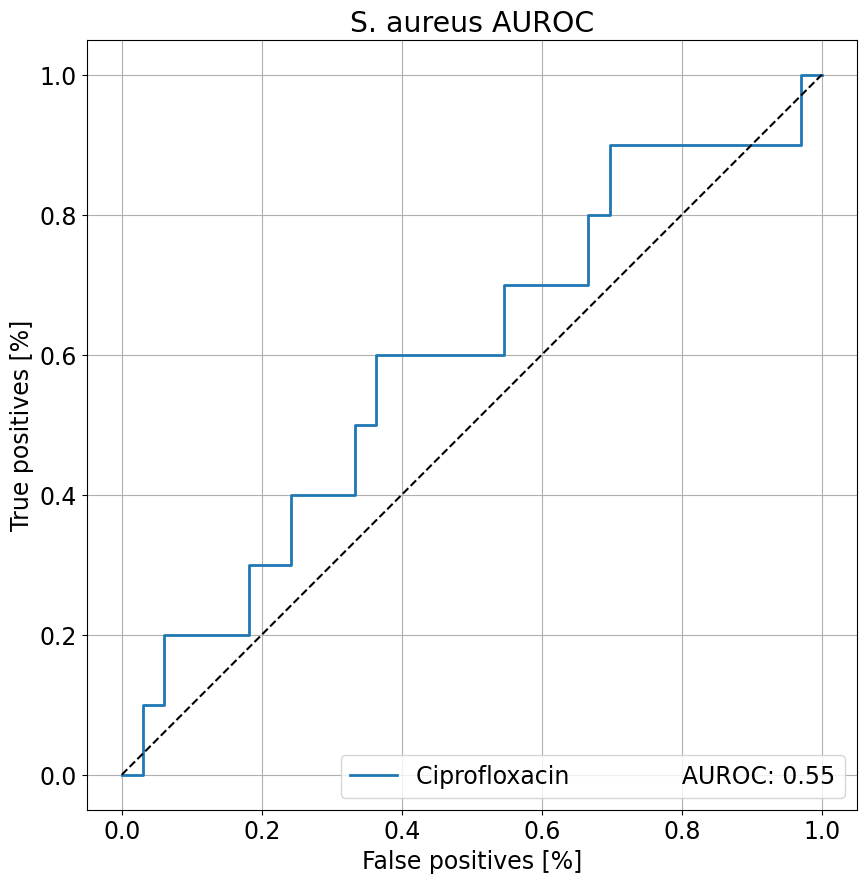

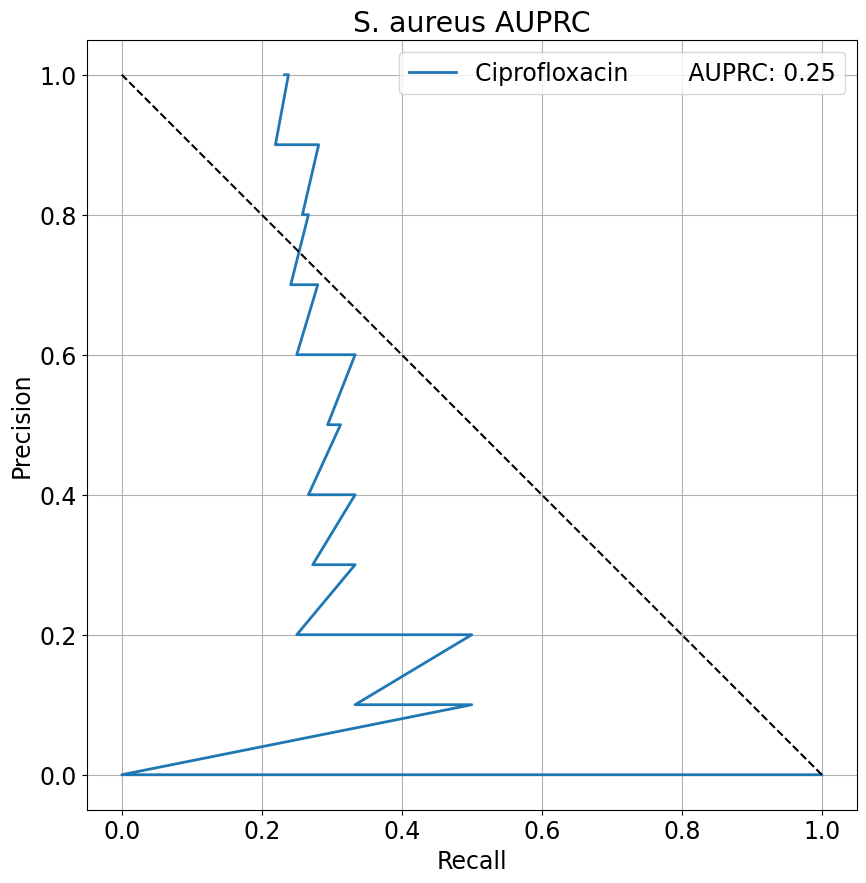

In [55]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()